## Рубежный контроль №1.
### ИУ5-22М Овчинников С.С. Вариант 14.
#### Задание для И5-22М
Для произвольной колонки данных построить гистограмму.
#### Задание №14
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень".
#### Задание №34
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_wine

In [57]:
load = load_wine(as_frame=True)
X = load.data
Y = load.target
data = pd.DataFrame(data=load['data'], columns=load['feature_names'])
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

### Нормализация числового признака с использованием функции "квадратный корень"
Гистограмма столбца "color_intensity" до использования функции "квадратный корень"

(array([ 2., 10., 14., 17., 15., 13., 13., 14., 15., 15.,  9.,  5.,  7.,
         7.,  2.,  5.,  3.,  4.,  1.,  3.,  2.,  0.,  1.,  0.,  1.]),
 array([ 1.28  ,  1.7488,  2.2176,  2.6864,  3.1552,  3.624 ,  4.0928,
         4.5616,  5.0304,  5.4992,  5.968 ,  6.4368,  6.9056,  7.3744,
         7.8432,  8.312 ,  8.7808,  9.2496,  9.7184, 10.1872, 10.656 ,
        11.1248, 11.5936, 12.0624, 12.5312, 13.    ]),
 <BarContainer object of 25 artists>)

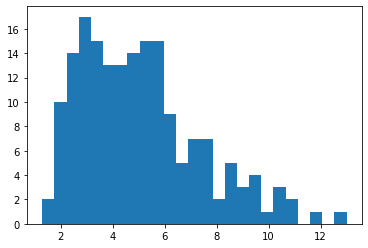

In [58]:
plt.hist(data['color_intensity'], bins=25)

Использование функции "квадратный корень"

(array([ 1.,  1.,  4.,  7., 11., 14., 12.,  8., 13., 10., 14., 13., 18.,
        10.,  5.,  8.,  8.,  2.,  6.,  4.,  4.,  3.,  0.,  1.,  1.]),
 array([1.13137085, 1.23033807, 1.32930528, 1.4282725 , 1.52723972,
        1.62620694, 1.72517415, 1.82414137, 1.92310859, 2.0220758 ,
        2.12104302, 2.22001024, 2.31897745, 2.41794467, 2.51691189,
        2.61587911, 2.71484632, 2.81381354, 2.91278076, 3.01174797,
        3.11071519, 3.20968241, 3.30864962, 3.40761684, 3.50658406,
        3.60555128]),
 <BarContainer object of 25 artists>)

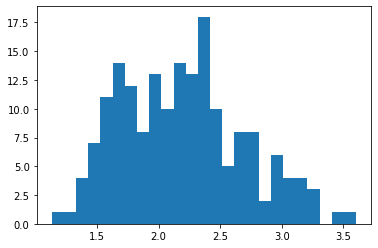

In [59]:
normalized_col = data['color_intensity']**(1/2)
plt.hist(normalized_col, bins=25)

### Отбор признаков с использованием метода вложений  на основе логистической регрессии

In [70]:
e_lr1 = LogisticRegression(C=1, solver='liblinear', penalty='l1', max_iter=500)
e_lr1.fit(X, Y)
list(zip(e_lr1.classes_, e_lr1.coef_))

[(0,
  array([-0.48482606,  0.67937441,  1.27447473, -0.62875154, -0.03577108,
          0.        ,  1.56774205,  0.        ,  0.        , -0.02354309,
          0.        ,  0.34684265,  0.01583498])),
 (1,
  array([ 0.97728155, -1.20351848, -0.30999219,  0.23591953,  0.00623563,
          0.        ,  0.65441449,  0.        ,  0.66364315, -1.98995471,
          0.85018826,  0.        , -0.01345867])),
 (2,
  array([-1.49623840e-02,  4.19193985e-01,  0.00000000e+00,  5.47126149e-02,
          3.49160280e-03,  0.00000000e+00, -3.50536001e+00,  0.00000000e+00,
          0.00000000e+00,  1.02349077e+00,  0.00000000e+00, -1.49249552e+00,
         -1.01482097e-04]))]

In [71]:
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X, Y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True])